In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = 8,4
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check for possible null values in the dataset as missing values potentially screw the ml models
df.isnull().sum()
# the dataset does not contain null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()
# the describe method gives a quick overview of basic metrics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df["gender"] = df["gender"].astype("category")
df["race/ethnicity"] = df["race/ethnicity"].astype("category")
df["parental level of education"] = df["parental level of education"].astype("category") 
df["lunch"] = df["lunch"].astype("category")
df["test preparation course"] = df["test preparation course"].astype("category") 

In [7]:
# to get a more generalised idea about performance we add a total score field to the dataset which sums up all exam scores
df["total"] = df["math score"] +df["reading score"]+df["writing score"]

## General Score Analysis

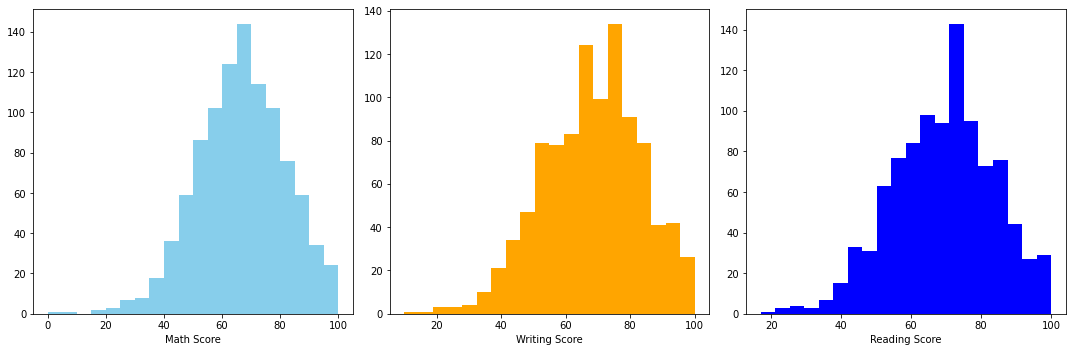

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(df["math score"], bins=20,  color = "skyblue")
axes[0].set_xlabel("Math Score")
axes[1].hist(df["writing score"], bins=20,  color = "orange")
axes[1].set_xlabel("Writing Score")
axes[2].hist(df["reading score"], bins=20,  color = "blue")
axes[2].set_xlabel("Reading Score")

fig.tight_layout()


In [9]:
np.corrcoef(df["math score"], df["writing score"])
# The magnitude is 0.80 which is a strong positive correlation.

array([[1.        , 0.80264205],
       [0.80264205, 1.        ]])

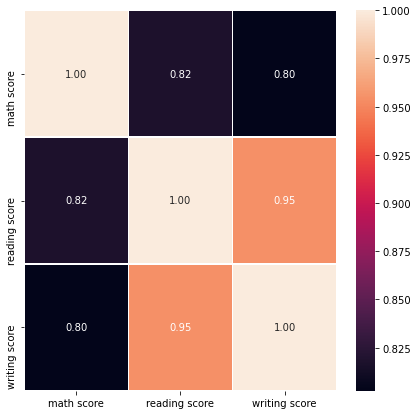

In [10]:
dfc= df.drop(columns= "total")
dfc.corr()
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

The above Heatmap shows that there is a high correlation between writing and reading score but less correlation between math score and writing score.

# Gender Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

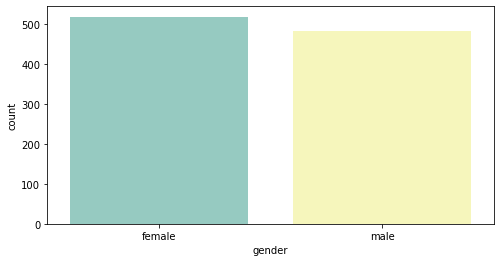

In [11]:
sns.countplot(x=df["gender"], palette="Set3")
# both genders are representated equally in the data sample

In [12]:
#palette ={"male":"C0","female":"C1"}
#sns.pairplot(df.loc[:, df.columns != 'total'], hue="gender", diag_kind="kde" ,palette = palette, plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)
#plt.show()

In [13]:
pl = df.groupby("gender")
pl=pl.mean()
cm = sns.light_palette("green", as_cmap=True)
s= pl.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


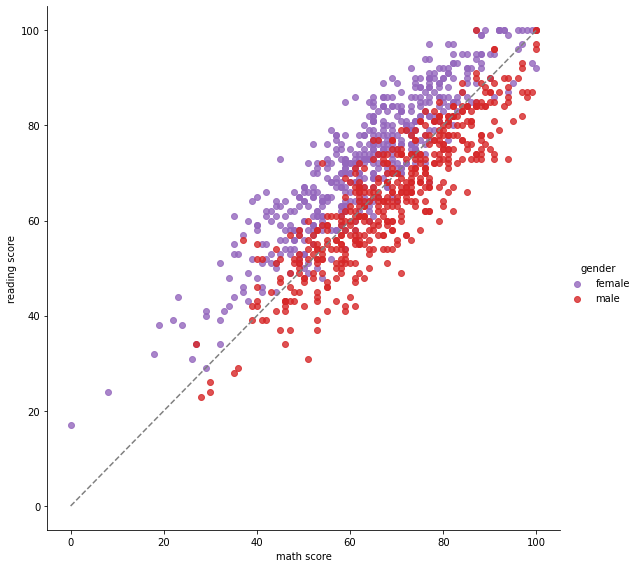

In [14]:
palette ={"male":"C3","female":"C4"}
vis1= sns.lmplot(data= df, x="math score", y="reading score", fit_reg=False,palette = palette, hue="gender", height=8, aspect=1)
vis1.ax.plot((0,100),(0,100) ,c="gray", ls="--")
plt.show()

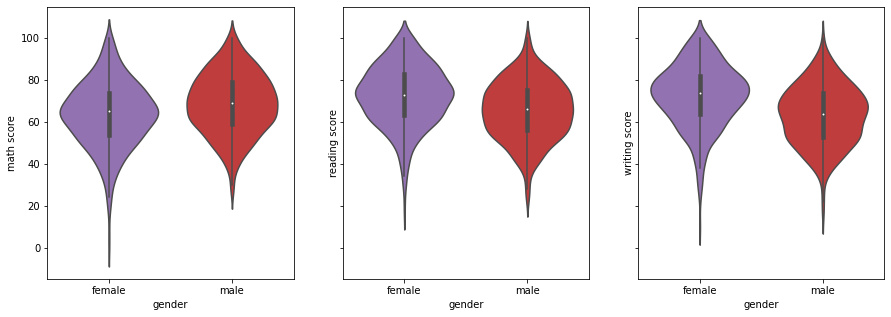

In [15]:
f, axes = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
w = sns.violinplot(data=df, x="gender", y="math score",palette = palette,ax=axes[0])
w = sns.violinplot(data=df, x="gender", y="reading score",ax=axes[1]  , palette = palette )
w = sns.violinplot(data=df, x="gender", y="writing score",ax=axes[2], palette = palette)

# Parental Level of Education Analysis

In [16]:
set(df["parental level of education"])
# these are the distinct values in the parental level of education column

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

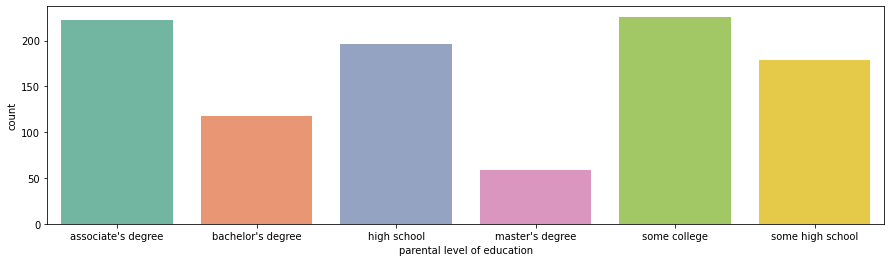

In [17]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x=df["parental level of education"], palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

In [18]:
len(df[df["parental level of education"]=="master's degree"]) # students where both parents obtain a master's degree

59

In [19]:
pl = df.groupby("parental level of education")
meanscore_byEducation =pl.mean()
medianscore_byEducation=pl.median()

In [20]:
cm = sns.light_palette("green", as_cmap=True)
s= meanscore_byEducation.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


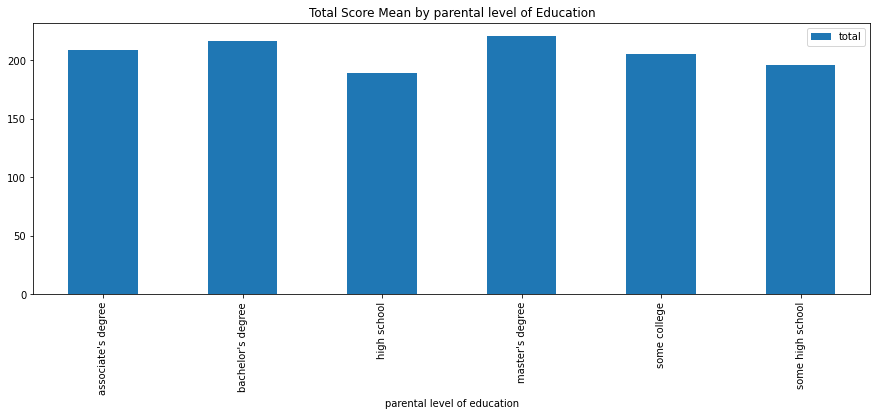

In [21]:
meanscore_byEducation.plot.bar(y="total",figsize=(15,5) )
plt.title("Total Score Mean by parental level of Education")
plt.show()

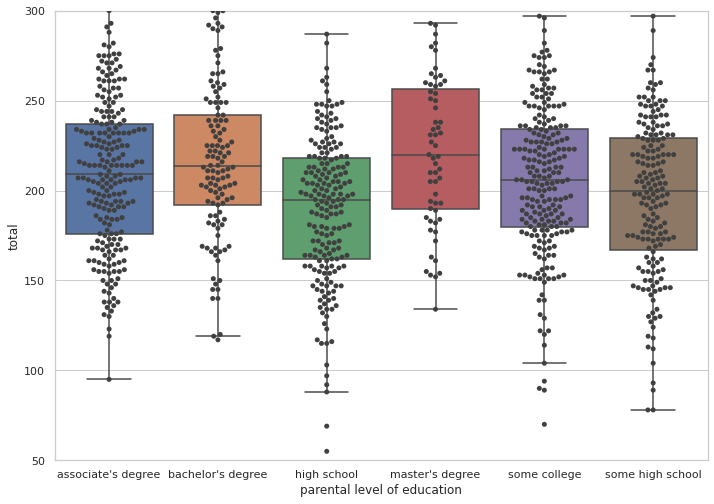

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="parental level of education", y="total", data=df, showfliers = False)
plt.gcf().set_size_inches(11.7, 8.27)
ax = sns.swarmplot(x="parental level of education", y="total", data=df, color=".25")
plt.ylim((50,300))
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

# Test Preparation Course Analysis

In [23]:
df["test preparation course"].unique()

['none', 'completed']
Categories (2, object): ['none', 'completed']

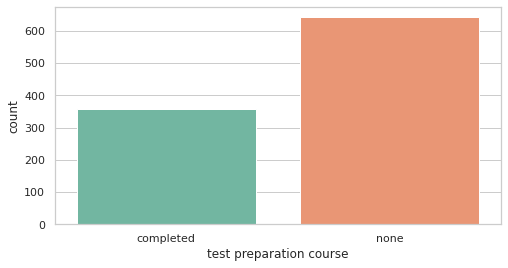

In [24]:
ax = sns.countplot(x=df["test preparation course"], palette="Set2")

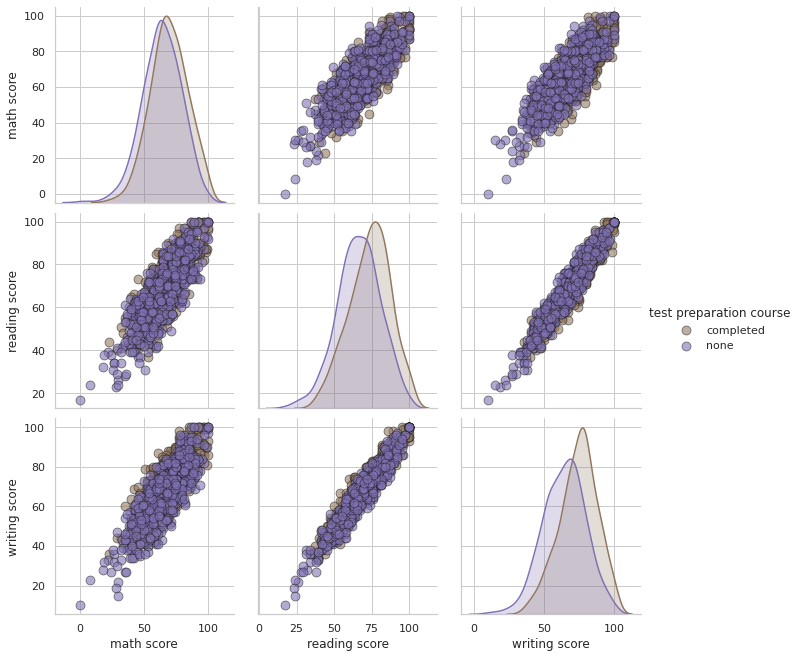

In [25]:
palette ={"completed":"C5","none":"C4"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="test preparation course", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)

In [26]:
prep =df.groupby("test preparation course")
prepare_mean = prep.mean()
prepare_mean

,math score,reading score,writing score,total
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


Completing the preparation course seems to have a positive effect on the score for all three exams.

#  Logistic Regression

In [27]:
def failed(mathScore):
    if(mathScore<50): 
        return 1 # failed
    else: 
        return 0 # passed

In [28]:
#copy data model
prepared_Data = df
#insert column (independent variable)
y = list(map(failed, prepared_Data["math score"]))
prepared_Data["y"] = prepared_Data["math score"].apply(lambda x: failed(x) ) # variable to predict
#delete math score from model as math failed is directly dependent on it
prepared_Data = prepared_Data.drop(columns= ["math score","total", "lunch"] )
prepared_Data.head()

,gender,race/ethnicity,parental level of education,test preparation course,reading score,writing score,y
0,female,group B,bachelor's degree,none,72,74,0
1,female,group C,some college,completed,90,88,0
2,female,group B,master's degree,none,95,93,0
3,male,group A,associate's degree,none,57,44,1
4,male,group C,some college,none,78,75,0


In [29]:
total = len(prepared_Data)
failed = len(prepared_Data[prepared_Data["y"] ==1 ])
passed = len(prepared_Data[prepared_Data["y"] ==0 ])
print("Percentage of Students that failed maths:" + str(((failed/total)*100)) +"%")
print("Percentage of Students that passed the maths exam:" + str(((passed/total)*100))  +"%")

Percentage of Students that failed maths:13.5%
Percentage of Students that passed the maths exam:86.5%


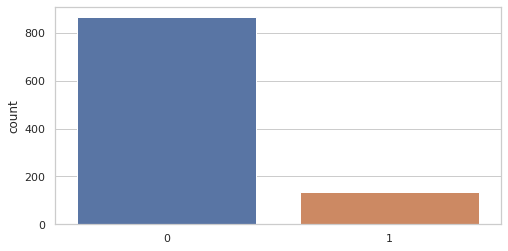

In [30]:
ax = sns.countplot( x=np.asarray(y))
rcParams['figure.figsize'] = 15, 5

In [31]:
grouped = prepared_Data.groupby("y").mean()
grouped

,reading score,writing score
y,,
0,72.243931,71.302890
1,49.466667,47.237037


In [32]:
#get categorical columns so we can generate dummy variables
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

catFilter = [  is_categorical(prepared_Data.iloc[:,i])  for i in range(0, len(prepared_Data.columns) )] 
categoricalCols = prepared_Data.columns[catFilter].tolist()
print(categoricalCols)    

['gender', 'race/ethnicity', 'parental level of education', 'test preparation course']


In [33]:
#Get dummy variables for al categorical columns
cat_vars= categoricalCols
for var in cat_vars:
    cat_list = "var"+"_" +var
    cat_list = pd.get_dummies(prepared_Data[var],drop_first=True, prefix=var)
    df1= prepared_Data.join(cat_list)
    prepared_Data= df1
    

In [34]:
#Remove original categorical columns
cat_vars= categoricalCols
data_vars=prepared_Data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
finalDf = prepared_Data[to_keep]

In [35]:
X = finalDf.loc[: , finalDf.columns != "y"]
y = finalDf.loc[: , finalDf.columns == "y"]
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train) #create oversampling on traning data only
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of passed",len(os_data_y[os_data_y['y']==0]))
print("Number of failed",len(os_data_y[os_data_y['y']==1]))
print("Proportion of passed data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of failed data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1204
Number of passed 602
Number of failed 602
Proportion of passed data in oversampled data is  0.5
Proportion of failed data in oversampled data is  0.5


In [36]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
finalDf_vars=finalDf.columns.values.tolist()
y=['y']
X=[i for i in finalDf_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
X=os_data_X
y=os_data_y['y']

In [38]:
## Implementing the Model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.473070
         Iterations 6
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.318      
Dependent Variable:          y                         AIC:                       1165.1522  
Date:                        2020-12-05 11:28          BIC:                       1231.3665  
No. Observations:            1204                      Log-Likelihood:            -569.58    
Df Model:                    12                        LL-Null:                   -834.55    
Df Residuals:                1191                      LLR p-value:               9.3050e-106
Converged:                   1.0000                    Scale:                     1.0000     
No. Iterations:              6.0000                                                          
--------------------------------------------------------------------------------------------

## Train Model

In [39]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [41]:
# Creating the Confusion Matrix to visualize the model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[137  14]
 [  5 145]]


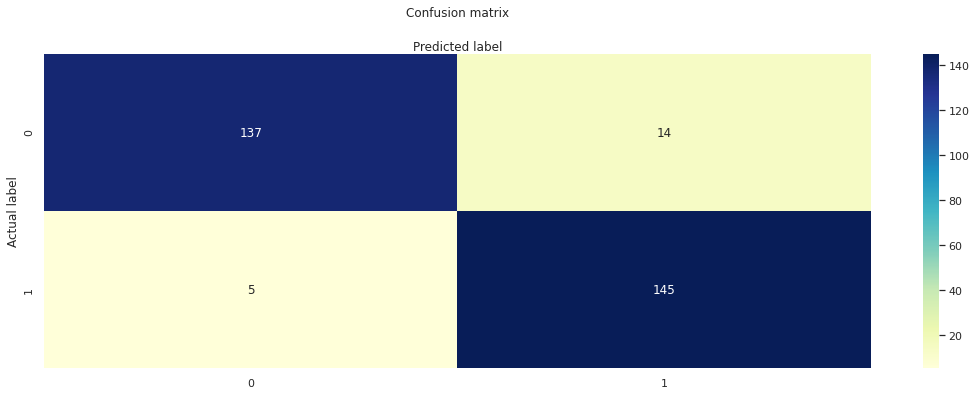

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The above Heatmap shows that our model predicted 154 + 180 cases correctly while 17 + 11 students were incorrectly classified.

In [43]:
# "accuracy", "precision", "recall"
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10, scoring="accuracy")
print(accuracies.mean() )
print(accuracies.std() )


0.9424297924297924
0.023105863332232503


In [44]:
#GRID SEARCH to find best model and hyperparameters
from sklearn.model_selection import GridSearchCV
parametersLog = [{'C':[0.01, 0.1,1,10,100,1000], 'penalty':["l1","l2"], 'fit_intercept':[True, False]  }]
grid_searchLog =GridSearchCV(estimator=logreg, 
                          param_grid = parametersLog,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_searchLog = grid_searchLog.fit(X_train,y_train)
best_accuracyLog = grid_searchLog.best_score_
best_parametersLog = grid_searchLog.best_params_

In [45]:
print(best_accuracyLog)
print(best_parametersLog)

0.9446520146520146
{'C': 1000, 'fit_intercept': True, 'penalty': 'l2'}


Setting the penalty prameter to "l1" could improve the model performance currently being set to l2.

### Building learning curve

In [46]:
train_sizes = list(np.linspace(0,639,5).astype(int))
print(train_sizes)
train_sizes2 = [1, 100, 500, 2000, 5000, 7654]

[0, 159, 319, 479, 639]


In [47]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                         estimator = logreg,
                                      X = X_train, y = y_train, train_sizes = np.linspace(.1, 1.0, 5), cv = 5,
                scoring = 'neg_mean_squared_error', shuffle=True)

In [48]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.04166667 -0.04166667 -0.06944444 -0.04166667 -0.04166667]
 [-0.05128205 -0.02991453 -0.04273504 -0.05555556 -0.02991453]
 [-0.04534005 -0.04282116 -0.04030227 -0.05541562 -0.04534005]
 [-0.0411449  -0.03756708 -0.03577818 -0.05366726 -0.05008945]
 [-0.05540166 -0.04293629 -0.0401662  -0.05124654 -0.05263158]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.06629834 -0.0718232  -0.06629834 -0.08333333 -0.05      ]
 [-0.0441989  -0.06077348 -0.05524862 -0.05       -0.03888889]
 [-0.06077348 -0.08287293 -0.06629834 -0.05555556 -0.03333333]
 [-0.0441989  -0.06629834 -0.06629834 -0.05       -0.03333333]
 [-0.0441989  -0.06629834 -0.0718232  -0.06111111 -0.03333333]]


In [49]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 72     0.047222
234    0.041880
397    0.045844
559    0.043649
722    0.048476
dtype: float64

 --------------------

Mean validation scores

 72     0.067551
234    0.049822
397    0.059767
559    0.052026
722    0.055353
dtype: float64


(0.0, 0.1)

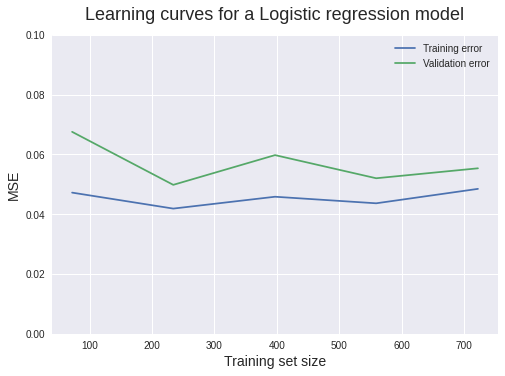

In [50]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.1)

In [51]:
#Analyse feature importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X, y = X_train, y_train
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_ )

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

(903, 13)
[0.31237602 0.31620102 0.07065447 0.02922161 0.04479709 0.04719237
 0.03725281 0.0186595  0.02812735 0.00751501 0.04457224 0.02099106
 0.02243944]


In [52]:
names = list(X.columns)
importance = clf.feature_importances_ 

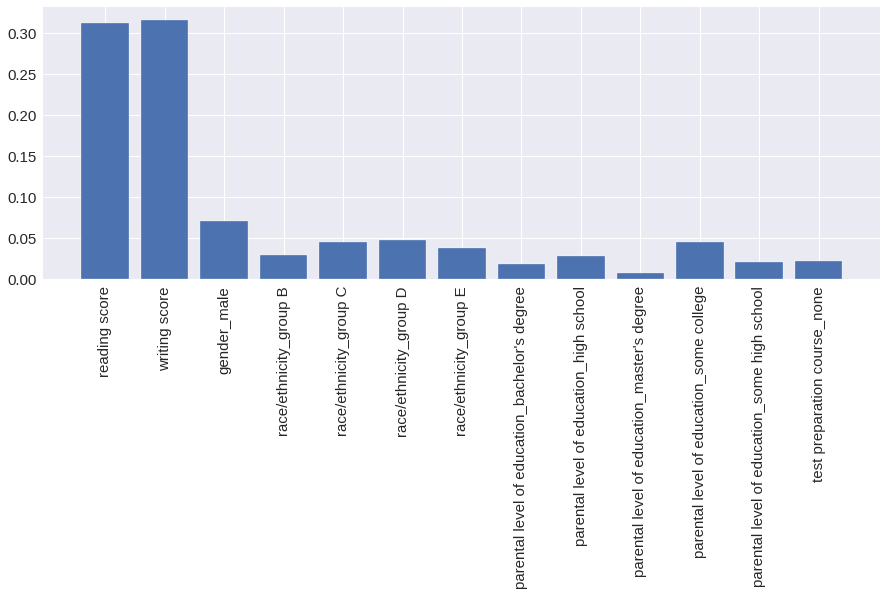

In [53]:
rcParams['figure.figsize'] = 15, 5
plt.bar(np.arange(len(names)), importance   )
plt.xticks(np.arange(len(names))  , names, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## SVM Model

In [54]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear' , C=10)  # linear classifier in 2d is straight line
classifierSVM.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [55]:
y_pred2 = classifierSVM.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[137  14]
 [  5 145]]


In [56]:
accuraciesSVM = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 10)
print(accuraciesSVM.mean() )
print(accuraciesSVM.std() )

0.9424542124542125
0.020141491213835964


In [57]:
#GRID SEARCH to find best model and hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.1,1,10,100,1000], 'kernel':['linear']  },
               {'C':[0.1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.5,0.1,0.01,0.001,0.0001]}]
grid_search =GridSearchCV(estimator=classifierSVM, 
                          param_grid = parameters,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [58]:
print(best_accuracy)
print(best_parameters)

0.9446764346764347
{'C': 0.1, 'kernel': 'linear'}


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9302325581395349


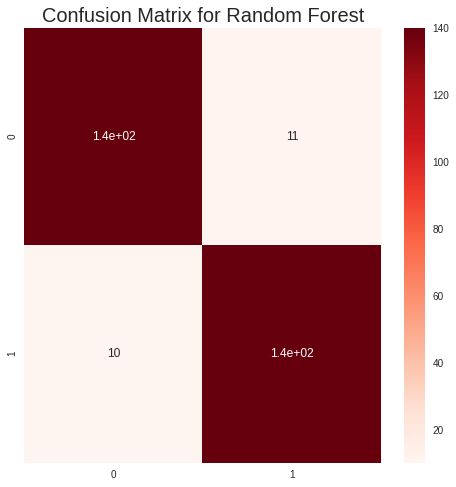

In [60]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()